# Maximum inscribed/minimum circumscribed ellipsoids

See ch8.4, pg410 of Boyd

TODO: 

* make Ellipsoid type - will simplify everything

First, load the necessary libraries. Thig might take a while

In [221]:
using PyPlot
using Convex, SCS
set_default_solver(SCSSolver(verbose=0));

Pick points

In [313]:
n_dims = 2

# Points
if n_dims==2
     x = [10 0; 0 5; 1 1]
#     x = [1 0; 0 0; 0 1; 1 1] #square
elseif n_dims==3
     x = [10 0 0; 0 10 0; 0 0 10; 10 10 10]
#      x = [1 0 0; 1 1 0; 1 1 1; 0 1 0; 0 1 1; 0 0 1; 0 0 0; 1 0 1] #cube
else
     x = rand(n_dims+1, n_dims)
end


3×2 Array{Int64,2}:
 10  0
  0  5
  1  1

### Lowner-John Ellipsoid

Finds minimum volume ellipsoid around a finite set of points (2d in this case)

An ellipsoid can be represented as $\{ v \text{ | } ||Av+b||_2 \leq 1\}$

Thus, the constraint to contain all points is: $||Ax_i + b ||_2 \leq1$ for all $x_i$

We can minimize the volume of the ellipse by minimizing $log(det(inv(A)))$, because the volume of the ellipse is proportional to $det(inv(A))$. Intuition for this is that as values in A get larger, v must be smaller to keep $||Ax_i + b ||_2 \leq 1$

But we can't do $inv$ in Convex.jl so we instead _maximize_ $logdet(A)$. $logdet$ also adds an implicit constraint that A is symmetric positive-definite

In [314]:
# Set up problem
A = Variable(n_dims,n_dims)
b = Variable(n_dims)

objective = logdet(A)
problem = maximize(objective);

for i in 1:size(x)[1]
     problem.constraints += (norm(A*x[i,:]+b) <= 1)
end

In [315]:
@time solve!(problem)

# Results
println("Problem status: ", problem.status)
println("Optimal value: ", problem.optval)
println("A: ", A.value)
println("b: ", b.value)
A = A.value
b = b.value;

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{DataStructures.OrderedDict{UInt64,Tuple{Union{AbstractArray, Number},Union{AbstractArray, Number}}}}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.ExpConstraint, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/constraints/exp_constraints.jl:52
 [4] conic_form!(::Convex.LogAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/exp_cone/log.jl:55
 [5] conic_form!(::Convex.SumAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/sum.jl:48
 [6] conic_form!(::Convex.LogDetAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/exp_+_sdp_cone/logdet.jl:38
 [7] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [8] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/constraints/co

 [11] include_string(::String, ::String) at ./loading.jl:515
 [12] include_string(::Module, ::String, ::String) at /Users/Kazu/.julia/v0.6/Compat/src/Compat.jl:577
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/Kazu/.julia/v0.6/IJulia/src/execute_request.jl:154
 [14] eventloop(::ZMQ.Socket) at /Users/Kazu/.julia/v0.6/IJulia/src/eventloop.jl:8
 [15] (::IJulia.##14#17)() at ./task.jl:335
while loading In[315], in expression starting on line 237
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Int64}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.TransposeAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/transpose.jl:51
 [4] conic_form!(::Convex.HcatAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/stack.jl:47
 [5] conic_form!(::Convex.TransposeAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/transpose.jl:44
 [6] conic_form!(::C

  0.164431 seconds (107.23 k allocations: 3.316 MiB)
Problem status: Optimal
Optimal value: -2.6001457566318957
A: [0.193244 0.118632; 0.118632 0.456954]
b: [-0.94576; -1.34902]


Module, ::String, ::String) at /Users/Kazu/.julia/v0.6/Compat/src/Compat.jl:577
 [20] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/Kazu/.julia/v0.6/IJulia/src/execute_request.jl:154
 [21] eventloop(::ZMQ.Socket) at /Users/Kazu/.julia/v0.6/IJulia/src/eventloop.jl:8
 [22] (::IJulia.##14#17)() at ./task.jl:335
while loading In[315], in expression starting on line 237
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{DataStructures.OrderedDict{UInt64,Tuple{Union{AbstractArray, Number},Union{AbstractArray, Number}}}}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCConstraint, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:21
 [4] conic_form!(::Convex.EucNormAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/second_order_cone/norm2.jl:47
 [5] conic_form!(::Convex.NegateAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/add_subtra

Functions for plotting ellipsoid below. "inv" because they use the representation of an ellipsoid as an inverse image of unit ball under affine mapping

In [316]:
function ellipsoid_points2d_inv(Ae::Array, be::Array)
    angles = collect(0 : 0.1 : 2*pi)
    u = [cos.(angles)-be[1] sin.(angles)-be[2]]'
    ellipse = inv(Ae)*u 
    return ellipse
end

function ellipsoid_points3d_inv(Ae::Array, be::Array)
    angles = collect(0 : 0.1 : 2*pi)
    vecs = []
    for i in angles
        for j in angles
            v = [cos.(i).*sin.(j)-be[1] sin.(i).*sin.(j)-be[2] cos.(j)-be[3]]
            if isempty(vecs)
                vecs = v
            end
            vecs = [vecs; v]
        end
    end
    ellipse = inv(Ae)*vecs'
end

ellipsoid_points3d_inv (generic function with 1 method)

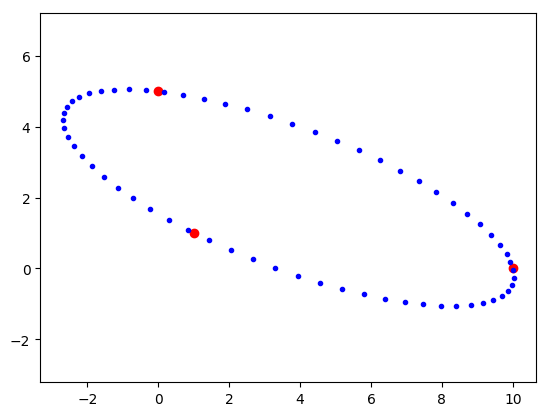

(-3.329271433011378, 10.659206986719898, -1.3575371981522453, 5.359800054556887)

In [317]:
# Plot

if n_dims==2
     for i in 1:size(x)[1]
          plot(x[i,1], x[i,2], "ro")
     end
    
     e = ellipsoid_points2d_inv(A, b)
     plot(e[1,:], e[2,:], "b.")
     axis("equal")
elseif n_dims==3
     for i in 1:size(x)[1]
          plot3D([x[i,1]], [x[i,2]], [x[i,3]], "ro")
     end

     e = ellipsoid_points3d_inv(A, b)
     plot3D(e[1,:], e[2,:], e[3,:], "b.", markersize=1)
     axis("equal")
end

In [318]:
println(A)
println(b)

[0.193244 0.118632; 0.118632 0.456954]
[-0.94576; -1.34902]


### Maximum Volume Inscribed Ellipsoid

Here, we need to use the inequality representation of a polyhedron (convert from vertex representation). 
Also, representation of ellispoid goes from  can be $\{ v \text{ | } ||Av+b||_2 \leq 1\}$ to $\{Bu+d \text{ | } ||u||_2 \leq 1 \}$


In [321]:
using Polyhedra
using CDDLib

In [322]:
v_rep = SimpleVRepresentation(x)
poly = polyhedron(v_rep, CDDLibrary())

CDDLib.CDDPolyhedron{2,Float64}(Nullable{CDDLib.CDDInequalityMatrix{2,Float64,S} where S<:Union{CDDLib.GMPRational, Float64}}(), Nullable{CDDLib.CDDGeneratorMatrix{2,Float64,S} where S<:Union{CDDLib.GMPRational, Float64}}(V-representation
begin
 3 3 real
 1.0 10.0 0.0
 1.0 0.0 5.0
 1.0 1.0 1.0
end), Nullable{CDDLib.CDDPolyhedra{2,Float64,S} where S}(), false, false, false, false)

In [323]:
h_rep = SimpleHRepresentation(hrep(poly))
Ah = h_rep.A
bh = h_rep.b
println("A: ", h_rep.A)
println("b: ", h_rep.b)

A: [-1.0 -9.0; 1.0 2.0; -4.0 -1.0]
b: [-10.0, 10.0, -5.0]


In [324]:
# Set up problem
B = Variable(n_dims,n_dims)
d = Variable(n_dims)

objective = logdet(B)
problem = maximize(objective)

for i in 1:size(Ah)[1]
     problem.constraints += norm(B*Ah[i,:])+Ah[i,:]'*d <= bh[i]
end

In [325]:
@time solve!(problem)

# Results
println("Problem status: ", problem.status)
println("Optimal value: ", problem.optval)
println("B: ", B.value)
println("d: ", d.value)
B,d = B.value, d.value;

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{DataStructures.OrderedDict{UInt64,Tuple{Union{AbstractArray, Number},Union{AbstractArray, Number}}}}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.ExpConstraint, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/constraints/exp_constraints.jl:52
 [4] conic_form!(::Convex.LogAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/exp_cone/log.jl:55
 [5] conic_form!(::Convex.SumAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/sum.jl:48
 [6] conic_form!(::Convex.LogDetAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/exp_+_sdp_cone/logdet.jl:38
 [7] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [8] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/constraints/co

 [14] eventloop(::ZMQ.Socket) at /Users/Kazu/.julia/v0.6/IJulia/src/eventloop.jl:8
 [15] (::IJulia.##14#17)() at ./task.jl:335
while loading In[325], in expression starting on line 237
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Int64}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.TransposeAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/transpose.jl:51
 [4] conic_form!(::Convex.HcatAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/stack.jl:47
 [5] conic_form!(::Convex.TransposeAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/transpose.jl:44
 [6] conic_form!(::Convex.DotMultiplyAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/multiply_divide.jl:175
 [7] conic_form!(::Convex.IndexAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/index.jl:72
 [8] conic_form!(::Conve

  0.212091 seconds (110.25 k allocations: 3.453 MiB)
Problem status: Optimal
Optimal value: 1.2142419229153507
B: [3.07772 -0.799163; -0.799166 1.30179]
d: [3.66666; 1.99999]


(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{DataStructures.OrderedDict{UInt64,Tuple{Union{AbstractArray, Number},Union{AbstractArray, Number}}}}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCConstraint, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:21
 [4] conic_form!(::Convex.EucNormAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/second_order_cone/norm2.jl:47
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.NegateAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:47
 [7] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [8] conic_form!(::Convex.LtConstraint, ::Convex.UniqueConicForms) at /Users/Kazu/.julia/v0.6/Convex/src/constraint

In [326]:
function plot_ellipsoid_2dforward(Be::Array, de::Array)
    angles = collect(0 : 0.3 : 2*pi)
    u = [cos.(angles) sin.(angles)]'
    e = Be*u + repmat([de[1]; de[2]], 1, length(angles))
    plot(e[1,:], e[2,:], "b.")
end

function plot_ellipsoid_3dforward(Be::Array, de::Array)
    angles = collect(0 : 0.3 : 2*pi)
    vecs = []
    for i in angles
        for j in angles
            v = [cos.(i).*sin.(j); sin.(i).*sin.(j); cos.(j)]
            if isempty(vecs)
                vecs = v
            end
            vecs = hcat(vecs, v)
        end
    end
    
    ellipse = Be*vecs + repmat([de[1], de[2], de[3]], 1, size(vecs,2))
    plot3D(e[1,:], e[2,:], e[3,:], "b.")
end

plot_ellipsoid_3dforward (generic function with 1 method)

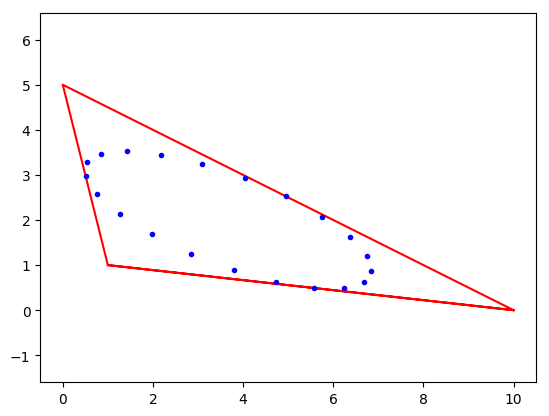

(-0.5, 10.5, -0.25, 5.25)

In [327]:
if n_dims==2
    # Draw polygon
    xplot = [x[:,1]; x[1,1]; x[end,1]]
    yplot = [x[:,2]; x[1,2]; x[end,2]]
    plot(xplot, yplot, "r")
    plot_ellipsoid_2dforward(B,d)
elseif n_dims==3
    # Draw polygon
    xplot = [x[:,1]; x[1,1]; x[end,1]]
    yplot = [x[:,2]; x[1,2]; x[end,2]]
    zplot = [x[:,3]; x[1,3]; x[end,3]]
    plot3D(xplot, yplot, zplot, "r.")
    plot_ellipsoid_3dforward(B,d)
end
axis("equal")

In [328]:
println(B)
println(d)

[3.07772 -0.799163; -0.799166 1.30179]
[3.66666; 1.99999]


### Plot covariance matrix TODO

Confidence ellipsoid represented by $\{v\text{ | }(v-\overline{x})^T\Sigma^{-1} (v-\overline{x})\leq c\}$

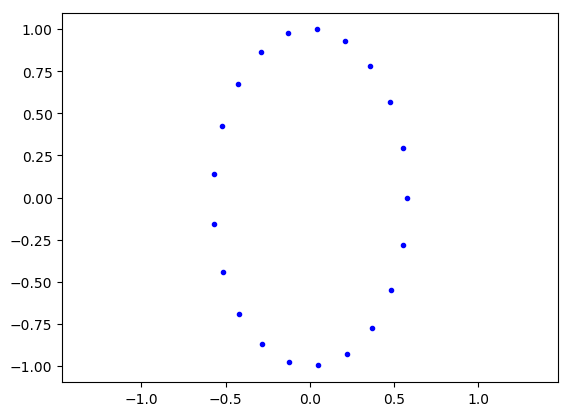

(-0.6290185695878571, 0.634796404369506, -1.0958475886078354, 1.0971779663760493)

In [211]:
function covariance_points2d(cov::Array, mean::Array, alpha::Number)
    # Convert covariance matrix ellipsoid to forward image representation
    (U,S,V) = svd(cov)
    sig = inv(diagm(sqrt.(S)))
    B = U*sig
    d = mean
    
    points = ellipsoid_points2d_forward(B, d)
    return points
end

# We are less sure about the x-coordinate
# Therefore confidence ellipsoid is smaller in that direction
# Note that this is a different ellipsoid from what's usually drawn for Kalman filters
Σ = [3 0; 0 1]
p = covariance_points2d(Σ, [0,0], 1);
plot(p[1,:], p[2,:], "b.")
axis("equal")

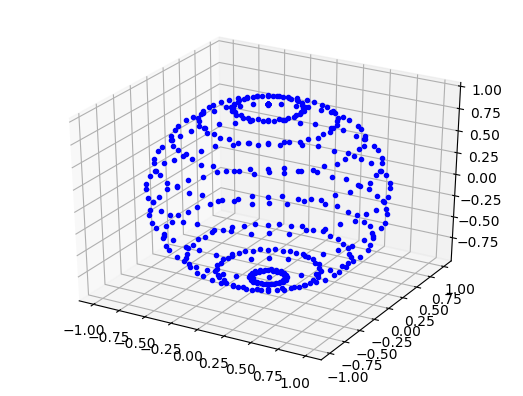

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x14ef84a90>

In [187]:
function covariance_points3d(cov::Array, mean::Array, alpha::Number)
    # Convert covariance matrix ellipsoid to forward image representation
    (U,S,V) = svd(cov)
    sig = inv(diagm(sqrt.(S)))
    B = U*sig
    d = mean
    
    points = ellipsoid_points3d_forward(B, d)
    return points
end

Σ = [1 0 0; 0 1 0; 0 0 1]
p = covariance_points3d(Σ, [0, 0, 0], 1);
plot3D(p[1,:], p[2,:], p[3,:], "b.")

test_plot (generic function with 1 method)

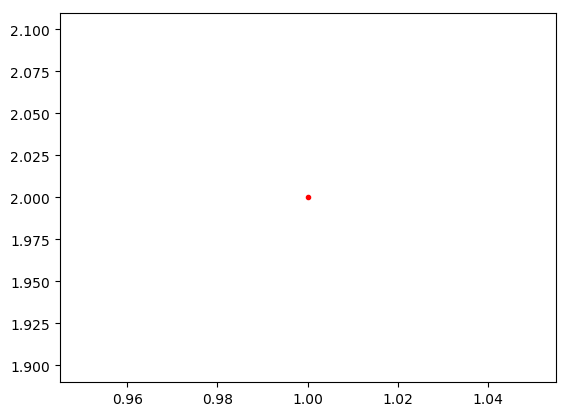

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14e37dc10>